In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [61]:
file = r"StudentPerformanceFactors.csv"
df = pd.read_csv(file)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [62]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [64]:
df.Exam_Score.max()

101

In [65]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col], )

In [66]:
#if the value of teacher_quality, parental_education_level and distance_from_home is 3, replace with null
df['Teacher_Quality'] = df['Teacher_Quality'].replace(3, np.nan)
df['Parental_Education_Level'] = df['Parental_Education_Level'].replace(3, np.nan)
df['Distance_from_Home'] = df['Distance_from_Home'].replace(3, np.nan)

In [67]:
print(df.Teacher_Quality.value_counts(), '\n')
print(df.Parental_Education_Level.value_counts(), '\n')
print(df.Distance_from_Home.value_counts())

Teacher_Quality
2.0    3925
0.0    1947
1.0     657
Name: count, dtype: int64 

Parental_Education_Level
1.0    3223
0.0    1989
2.0    1305
Name: count, dtype: int64 

Distance_from_Home
2.0    3884
1.0    1998
0.0     658
Name: count, dtype: int64


In [68]:
imputer = KNNImputer(n_neighbors=1)
df[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']] = imputer.fit_transform(df[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']])

In [69]:
print(df.Teacher_Quality.value_counts(), '\n')
print(df.Parental_Education_Level.value_counts(), '\n')
print(df.Distance_from_Home.value_counts())

Teacher_Quality
2.0    3980
0.0    1970
1.0     657
Name: count, dtype: int64 

Parental_Education_Level
1.0    3263
0.0    2039
2.0    1305
Name: count, dtype: int64 

Distance_from_Home
2.0    3924
1.0    2015
0.0     668
Name: count, dtype: int64


In [70]:
df.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,1.220070,1.203421,0.596035,7.02906,75.070531,1.307553,0.924474,1.493719,1.211442,1.304223,0.695929,1.190858,2.967610,0.105191,0.888906,1.492811,0.577267,67.235659
std,5.990594,11.547475,0.865634,0.871783,0.490728,1.46812,14.399784,0.782515,0.264258,1.230570,0.742264,0.898961,0.460048,0.755876,1.031231,0.306823,0.702754,0.672478,0.494031,3.890456
min,1.000000,60.000000,0.000000,0.000000,0.000000,4.00000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,0.000000,0.000000,0.000000,6.00000,63.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,65.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,7.00000,75.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,2.000000,1.000000,67.000000
75%,24.000000,90.000000,2.000000,2.000000,1.000000,8.00000,88.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,4.000000,0.000000,1.000000,2.000000,1.000000,69.000000
max,44.000000,100.000000,2.000000,2.000000,1.000000,10.00000,100.000000,2.000000,1.000000,8.000000,2.000000,2.000000,1.000000,2.000000,6.000000,1.000000,2.000000,2.000000,1.000000,101.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   int32  
 3   Access_to_Resources         6607 non-null   int32  
 4   Extracurricular_Activities  6607 non-null   int32  
 5   Sleep_Hours                 6607 non-null   int64  
 6   Previous_Scores             6607 non-null   int64  
 7   Motivation_Level            6607 non-null   int32  
 8   Internet_Access             6607 non-null   int32  
 9   Tutoring_Sessions           6607 non-null   int64  
 10  Family_Income               6607 non-null   int32  
 11  Teacher_Quality             6607 non-null   float64
 12  School_Type                 6607 non-null   int32  
 13  Peer_Influence              6607 

In [72]:
df=df.to_csv('Cleaned_StudentPerformanceFactors.csv', index=False)

In [ ]:
scaler = StandardScaler()
df_cleaned = df.dropna()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)


In [13]:
df_scaled.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03
mean,-1.161474e-16,-3.089199e-16,2.823028e-17,-2.688598e-18,1.312036e-16,-2.016449e-16,2.048712e-16,-2.054089e-16,-8.818602e-17,7.850707e-17,-4.194213e-17,1.935791e-17,1.226001e-16,-8.280882e-17,-1.720703e-17,-1.989563e-17,-6.855925e-18,4.731933e-17,8.065795e-18,-1.178681e-15
std,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00
min,-3.167760e+00,-1.730158e+00,-1.409559e+00,-1.380517e+00,-1.214685e+00,-2.063380e+00,-1.741167e+00,-1.671088e+00,-3.498640e+00,-1.213934e+00,-1.632214e+00,-1.450921e+00,-1.512845e+00,-1.575587e+00,-2.877953e+00,-3.428666e-01,-1.264985e+00,-2.220034e+00,-1.168570e+00,-3.145283e+00
25%,-6.636453e-01,-8.641026e-01,-1.409559e+00,-1.380517e+00,-1.214685e+00,-7.009903e-01,-8.383073e-01,-3.930605e-01,2.858254e-01,-4.012417e-01,-2.848830e-01,-1.450921e+00,-1.512845e+00,-2.525185e-01,-9.383768e-01,-3.428666e-01,-1.264985e+00,-7.328835e-01,-1.168570e+00,-5.746957e-01
50%,4.118568e-03,1.953115e-03,9.010618e-01,9.138045e-01,8.232589e-01,-1.979558e-02,-4.898448e-03,8.849665e-01,2.858254e-01,-4.012417e-01,-2.848830e-01,7.740379e-01,6.610061e-01,-2.525185e-01,3.141133e-02,-3.428666e-01,1.580962e-01,7.542668e-01,8.557465e-01,-6.057825e-02
75%,6.718825e-01,8.680088e-01,9.010618e-01,9.138045e-01,8.232589e-01,6.613991e-01,8.979612e-01,8.849665e-01,2.858254e-01,4.114511e-01,1.062448e+00,7.740379e-01,6.610061e-01,1.070550e+00,1.001199e+00,-3.428666e-01,1.580962e-01,7.542668e-01,8.557465e-01,4.535392e-01
max,4.010702e+00,1.734065e+00,9.010618e-01,9.138045e-01,8.232589e-01,2.023788e+00,1.731370e+00,8.849665e-01,2.858254e-01,5.287608e+00,1.062448e+00,7.740379e-01,6.610061e-01,1.070550e+00,2.940776e+00,2.916586e+00,1.581178e+00,7.542668e-01,8.557465e-01,8.679419e+00


In [14]:
#all records that have a zscore of 3 or more or 3 or less in exam_score, hours_studied, and sleep_hours, attenance, previous_scores
outliers = df_scaled[(df_scaled['Exam_Score'] > 3) | (df_scaled['Exam_Score'] < -3) | (df_scaled['Hours_Studied'] > 3) | (df_scaled['Hours_Studied'] < -3) | (df_scaled['Sleep_Hours'] > 3) | (df_scaled['Sleep_Hours'] < -3) | (df_scaled['Attendance'] > 3) | (df_scaled['Attendance'] < -3) | (df_scaled['Previous_Scores'] > 3) | (df_scaled['Previous_Scores'] < -3)]
outliers
df_scaled = df_scaled.drop(outliers.index)

In [15]:
exam_outliers = outliers[(outliers['Exam_Score'] > 3) | (outliers['Exam_Score'] < -3)]
hours_studied_outliers = outliers[(outliers['Hours_Studied'] > 3) | (outliers['Hours_Studied'] < -3)]
sleep_hours_outliers = outliers[(outliers['Sleep_Hours'] > 3) | (outliers['Sleep_Hours'] < -3)]
attendance_outliers = outliers[(outliers['Attendance'] > 3) | (outliers['Attendance'] < -3)]
previous_scores_outliers = outliers[(outliers['Previous_Scores'] > 3) | (outliers['Previous_Scores'] < -3)]


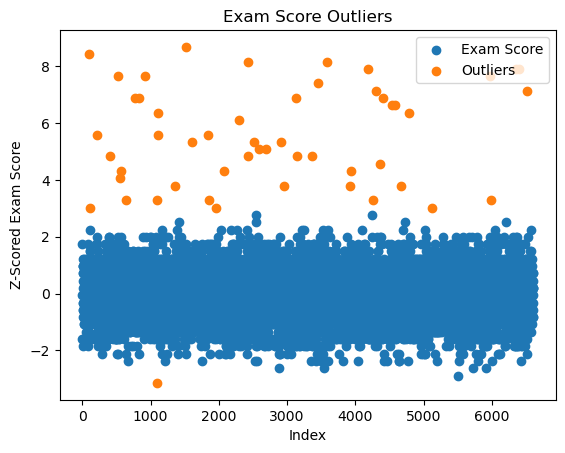

In [31]:
plt.scatter(df_scaled.index, df_scaled.Exam_Score)
plt.scatter(exam_outliers.index, exam_outliers['Exam_Score'])
plt.title('Exam Score Outliers')
plt.ylabel('Z-Scored Exam Score')
plt.xlabel('Index')
plt.legend(['Exam Score', 'Outliers'])
plt.show()

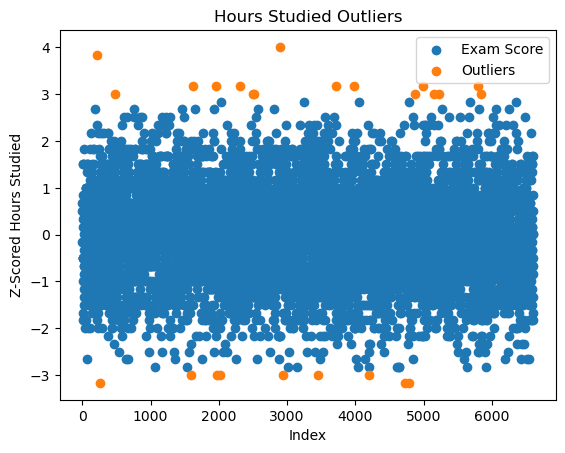

In [30]:
plt.scatter(df_scaled.index, df_scaled.Hours_Studied)
plt.scatter(hours_studied_outliers.index, hours_studied_outliers['Hours_Studied'])
plt.title('Hours Studied Outliers')
plt.ylabel('Z-Scored Hours Studied')
plt.xlabel('Index')
plt.legend(['Exam Score', 'Outliers'])
plt.show()